# Análise sobre o Tempo de Entrega

A base de dados utilizada está presente em ```data/data.xlsx```

A sua descrição está presente em ```data/description.txt```

Autores:
* David Joshua;
* Gabriel Cavalcanti Araújo;
* Gabriel Emannuel Gama Andrade.

## 1. Preparando o ambiente

### 1.1 Baixando os pacotes Necessários 

Abaixo estará o download de todos os pacotes úteis para a realização da análise

In [163]:
install.packages("pacman")

library(pacman)

pacman :: p_load(
    rio, # Importação fácil dos arquivos XLSX
    dplyr, # Permitir diversas formas de manipulação de dados
    skimr, # Utilização de outras formas de sumarizar os dados (Além da função built-in do R)
    psych, # Mesmo motivo do uso da skimr, melhorando a análise da base de dados
    )

Installing package into ‘/home/ferte/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)




Your package installed

Warning message in pacman::p_load(rio, dplyr, skimr, psych, ):
“Failed to install/load:
”


### 1.2 Carregando a base de dados em memória

Abaixo estará o carregamento da base de dados para a memória

In [164]:
DIRETORIO_DATA_SET <- "data/data.xlsx"

data <- import(DIRETORIO_DATA_SET)

data_numeric <- data %>% select_if(is.numeric)

data_character <- data %>% select_if(is.character)

### 1.3 Criando constantes para as Legendas

Em virtude que os gráficos irão possuir legendas comuns, em virtude das colunas que serão usadas para a geração do gráfico, esta seção irá determinar as constantes que serão usadas.

In [165]:
LEGENDA_TEMPO <- "Tempo da Entrega"
LEGENDA_DISTANCA <- "Distância da Entrega"
LEGENDA_VOLUME <- "Volume de pacotes"
LEGENDA_CAPACIDADE <- "Capacidade da Frota"
LEGENDA_INVESTIMENTO <- "Investimendo de Logística"
LEGENDA_TRAFEGO <- "Tráfego"
LEGENDA_NUMERO <- "Número de paradas"
LEGENDA_TECNOLOGIA <- "Presença de Tecnologia de Rastreamento"
LEGENDA_INFRAESTRUTRA <- "Qualidade da Infraestrutura da Rodovia"

## 2. Introdução

Iremos sumarizar o conjunto de dados, utilizando as funções à nossa disposição, com o fim de entender a base de dados e possíveis relacionamentos

### 2.1 Utilizando as funções built-in do R

A função summary é simples, mas resume as características dos dados eficientemente e é uma boa primeira vista de qualquer base de dados.

---

Informações importantes que a função traz para cada coluna numérica:
* Intervalos de valores (Valor mínimo e Máximo);
    * Também é apresentado o "comportamento" de crescimento, com os quantis e a mediana.
* Média;
* Valores ausentes.

In [166]:
summary(data)

 Distancia_entrega Volume_pacotes   Capacidade_frota Investimento_logistica
 Min.   :  8.926   Min.   : 50.56   Min.   : 68.53   Min.   : 5.447        
 1st Qu.: 41.454   1st Qu.: 75.65   1st Qu.: 81.85   1st Qu.:27.143        
 Median : 53.427   Median : 80.68   Median : 86.67   Median :34.112        
 Mean   : 52.836   Mean   : 80.98   Mean   : 86.54   Mean   :34.749        
 3rd Qu.: 63.448   3rd Qu.: 86.38   3rd Qu.: 91.00   3rd Qu.:42.474        
 Max.   :112.060   Max.   :106.66   Max.   :107.88   Max.   :62.487        
 NA's   :21        NA's   :21       NA's   :21       NA's   :21            
 Infraestrutura_rodoviaria    Trafego       Tecnologia_rastreamento
 Length:700                Min.   :-25.38   Length:700             
 Class :character          1st Qu.: 12.51   Class :character       
 Mode  :character          Median : 23.74   Mode  :character       
                           Mean   : 22.89                          
                           3rd Qu.: 33.21           

Em relação ao tipo das colunas:

<center>
  <table>
    <tr>
      <th>Tipo</th>
      <th>Quantidade</th>
    </tr>
    <tr>
      <th>Numérico</th>
      <th>7¹</th>
    </tr>
    <tr>
      <th>Textual (Categórico)²</th>
      <th>2</th>
    </tr>
  </table>
</center>

Observações:

* ¹ A coluna da variável dependente está sendo contada!
* ² Os valores categóricos serão melhores explorados em seções posteriores.

Dentre os valores numéricos, iremos utilizar a descrição textual da base de dados na tentativa de inferir o impacto de cada uma das colunas na variável dependente (O tempo de entrega):

<center>
  <table>
    <tr>
      <th>Coluna</th>
      <th>Proporcionalidade</th>
      <th>Motivo</th>
    </tr>
    <tr>
      <th>Distância</th>
      <th>Diretamente</th>
      <th>Quanto maior a distância, a viagem será mais longa.</th>
    </tr>
    <tr>
      <th>Volume</th>
      <th>Diretamente</th>
      <th>Quanto mais carga, será necessário mais cuidado na direção, causando mais lentidão na viagem.</th>
    </tr>
    <tr>
      <th>Capacidade</th>
      <th>Diretamente</th>
      <th>Quanto mais carga é possível ser levada, maior será o veículo, sendo necessário mais controle na direção.</th>
    </tr>
    <tr>
      <th>Investimento</th>
      <th>Inversamente</th>
      <th>Quanto mais planejado o transporte da carga, melhor será a escolha das rotas, dessa forma será mais rápido.</th>
    </tr>
    <tr>
      <th>Tráfego</th>
      <th>Diretamente</th>
      <th>Maior o trãnsito, mais lenta será a viagem.</th>
    </tr>
    <tr>
      <th>Número de paradas</th>
      <th>Diretamente</th>
      <th>Quanto mais paradas, mais lento.</th>
    </tr>
  </table>
</center>

Vamos testar com a função built-in do R que calcula a correlação linear!

In [167]:
correlacao_linear_de_pearson <- as.data.frame(
    cor(data_numeric,
        method = "pearson",
        use = "complete.obs"))

correlacao_tempo <- correlacao_linear_de_pearson[7]

correlacao_tempo

,Tempo_entrega
,<dbl>
Distancia_entrega,0.45790367
Volume_pacotes,-0.46462788
Capacidade_frota,0.08503601
Investimento_logistica,0.18255353
Trafego,0.70992634
Numero_paradas,0.45824699
Tempo_entrega,1.00000000


Não vamos nos assustar com esses resultados! Vale lembrar que a correlação linear é calculada considerando apenas a relação das duas variáveis no conjunto de dados, não considerando o relacionamento das mesmas com o resto do conjunto. Um exemplo é que não estamos considerando apenas a distância com o tempo, visto que nos casos que ocorreram altas distâncias, o tráfego poderia ter sido irrisório, vice-versa também podendo ocorrer.

O que esses dados mostram, de fato, é que não podemos considerar muitas dessas colunas isoladamente, possívelmente tendo melhores resultados utilizando uma regressão múltipla (mas não vamos nos apressar ainda, iremos analisar melhor o conjunto para ter uma maior profundidade).
* O motivo disto, é que informações que obviamente deveriam ser importantes, não estão sendo (pelo menos, não linearmente). Deste modo, temos certeza que ao menos valerá a pena um estudo de regressão em conjunto.

---

Abaixo iremos identificar os gráficos de dispersão das colunas numéricas em relação ao tempo de entrega, o objetivo é identificar as relações de correlação de forma visual, sem utilizar as fórmulas numéricas conhecidas. A fim de realizar isto, iremos utilizar a função de plotagem built-in do R.



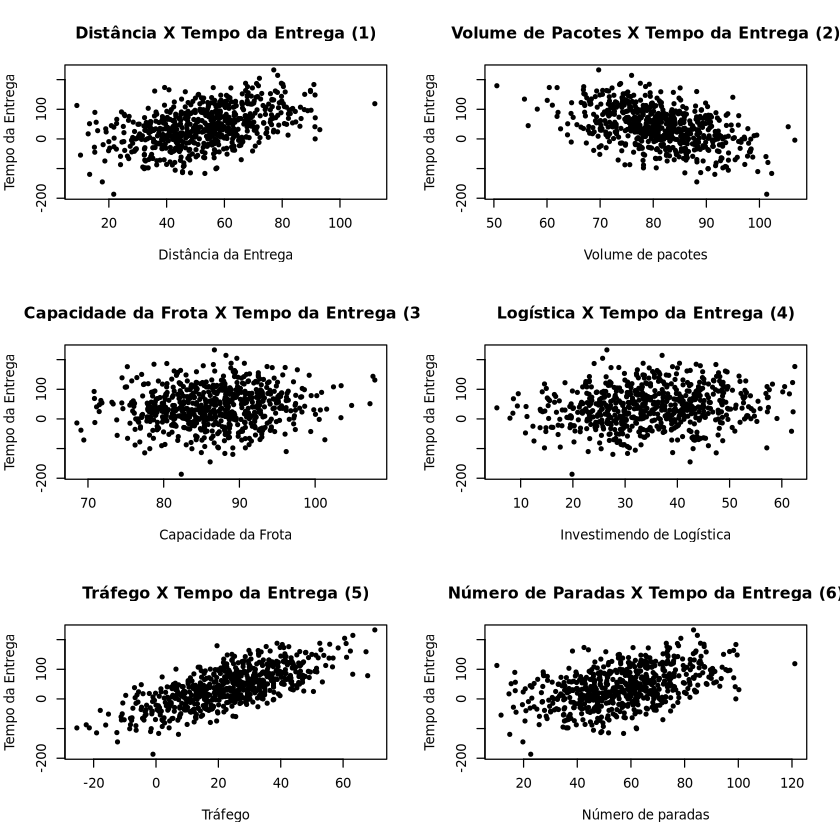

In [168]:
par(mfrow=c(3,2))

plot(x = data_numeric$Distancia_entrega,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_DISTANCA,
     ylab=LEGENDA_TEMPO,
     main = "Distância X Tempo da Entrega (1)"
     )

plot(x = data_numeric$Volume_pacotes,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_VOLUME,
     ylab=LEGENDA_TEMPO,
     main = "Volume de Pacotes X Tempo da Entrega (2)")

plot(x = data_numeric$Capacidade_frota,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_CAPACIDADE,
     ylab=LEGENDA_TEMPO,
     main = "Capacidade da Frota X Tempo da Entrega (3)")

plot(x = data_numeric$Investimento_logistica,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_INVESTIMENTO,
     ylab=LEGENDA_TEMPO,
     main = "Logística X Tempo da Entrega (4)")

plot(x = data_numeric$Trafego,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_TRAFEGO,
     ylab=LEGENDA_TEMPO,
     main="Tráfego X Tempo da Entrega (5)")

plot(x = data_numeric$Numero_paradas,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_NUMERO,
     ylab=LEGENDA_TEMPO,
     main="Número de Paradas X Tempo da Entrega (6)")

Foi identificada uma relação crescente nos gráficos 1, 5 e 6, embora apenas no gráfico 5 a correlação linear é mais aparente;

No gráfico 2 foi identificada uma relação decrescente, embora não tão aparente como no gráfico 5;

No gráficos 3 e 4, a correlação linear é indeferente, visto que não ocorre um comportamento crescente e nem decrescente.

### 2.2 Utilizando pacotes associados

Vamos aprofundar as análises utilizando funções de pacotes associados.

In [169]:
analise_detalhada_base_dados <- as.data.frame(skim(data))

analise_detalhada_base_dados_numericas <- analise_detalhada_base_dados[3:9, c(2, 10:17)]

analise_detalhada_base_dados_caracteres <- analise_detalhada_base_dados[1:2,2:9]

Antes de começarmos a tocar nos dados categóricos, vamos dar uma última olhada de forma detalhada nos dados numéricos:

In [170]:
analise_detalhada_base_dados_numericas

,skim_variable,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,Distancia_entrega,52.83643,16.468278,8.926286,41.4541880,53.42742,63.44788,112.06009,▂▇▇▂▁
4,Volume_pacotes,80.97612,8.245766,50.558933,75.6515374,80.68076,86.37844,106.65914,▁▂▇▅▁
5,Capacidade_frota,86.54448,6.471528,68.533403,81.8510943,86.67003,91.00019,107.88115,▁▆▇▃▁
6,Investimento_logistica,34.74923,10.665125,5.447083,27.1429689,34.11154,42.47379,62.48719,▁▅▇▆▂
7,Trafego,22.89164,15.965663,-25.380705,12.5140263,23.73891,33.21344,70.17059,▁▃▇▅▁
8,Numero_paradas,57.24183,17.756303,10.042547,45.3061734,57.92035,68.63091,121.05497,▂▇▇▂▁
9,Tempo_entrega,39.62845,63.629915,-186.619496,-0.9845775,37.39415,83.18893,232.80856,▁▃▇▅▁


A partir das informações acima, podemos inferir:
* O quanto os dados variam, isto pode ser verificada a partir de seu desvio padrão.
  * O tempo é o dado que mais varia, com um desvio padrão de 63,63 unidades;
  * A capacidade da frota e o volume carregado possuem as menores variações, com taxas de desvio padrão menores de 10 unidades.

* Onde está concentrada a maior parte de seus valores, isto é verificado nos histogramas no final da tabela:
  * A maior parte dos dados possui uma distribuição mais próxima do normal, sendo mais distribuida ao redor de sua média/mediana;
  * A distância de entrega e o número de paradas está mais concentrada à esquerda de sua mediana/média;

In [171]:
analise_detalhada_base_dados_caracteres

,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,Infraestrutura_rodoviaria,21,0.97,3,5,0,3,0
2,Tecnologia_rastreamento,21,0.97,3,3,0,2,0


São apenas duas colunas de valores categóricos, cada uma não contendo mais de 5 valores únicos.

Em uma análise mais profunda, para a infraestrutura da rodoviária, temos apenas três valores categóricos para representar a informação; Para a tecnologia de rastreamento, temos dois.

Vamos identificar os valores únicos de cada dessas colunas:

In [172]:
unique(data_character$Infraestrutura_rodoviaria)
unique(data_character$Tecnologia_rastreamento)

[1] "Medio" "Ruim"  "Bom"   NA

[1] "Sim" "Nao" NA

Uma coisa interessante a se identificar, é que os valores de infraestrutura são qualitativos ordinais, ou seja, existe uma relação de valor entre eles. A interpretação da qualidade de infraestrutura é que o "Ruim" seria o pior, o "Médio" o valor intermediário e o "Bom" o melhor valor;

Outra informação interessante, é que a tecnologia de rastreamento possui um valor de presença ou ausência, ou seja, o valor "Sim" significa que a tecnologia de rastreamento está sendo utilizada, e o valor "Não" significa que não existe uso na tecnologia de rastreamento.

---

Abaixo iremos identificar visualmente a relação entre os valores categóricos e a variável dependente:

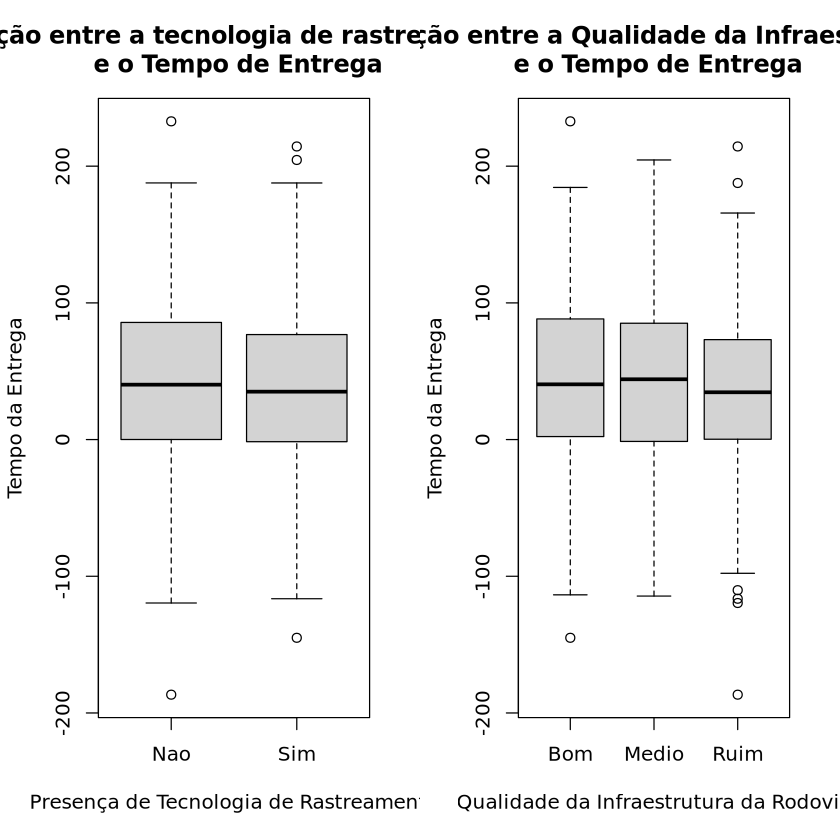

In [173]:
par(mfrow=c(1,2))

boxplot(
    Tempo_entrega ~ Tecnologia_rastreamento, 
    data = data,
    main="Relação entre a tecnologia de rastreamento \n e o Tempo de Entrega",
    ylab=LEGENDA_TEMPO,
    xlab=LEGENDA_TECNOLOGIA
    )

boxplot(
    Tempo_entrega ~ Infraestrutura_rodoviaria, 
    data = data,
    main="Relação entre a Qualidade da Infraestrutura \n e o Tempo de Entrega",
    ylab=LEGENDA_TEMPO,
    xlab=LEGENDA_INFRAESTRUTRA
    )

# Precisamos ver como isto é visto no RStudio

É perceptível que as variáveis categóricas não são tão importantes quando utilizadas sozinhas, visto que não importando qual valor categórico ela seja, elas compreendem um intervalo de valores de tempo de entrega extremamente semelhantes. Isto indica que estas variáveis, embora pareçam importantes em sua descrição, elas precisam ser utilizadas para complementar o contexto da regressão.

---

Finalizando a análise dos dados, é notório que este é um problema de Regressão Linear Múltipla, caso seja possível identificar alguma regressão linear. 

## 3. Análises de Regressão

Antes de tudo, vamos definir as variáveis independentes e a variável dependente:

In [174]:
VARIAVEIS_INDEPENDENTES = data[1:8]

VARIAVEL_DEPENDENTE = as.data.frame(data[9])

Como verificamos que é um problema de Regressão Linear Múltipla, o maior foco deste estudo será utilizando todas as colunas com a procura de otimizar o modelo, retirando colunas desnecessárias. Entretanto, antes de qualquer coisa, iremos identificar seria a regressão linear simples considerando apenas a coluna com maior correlação linear, ou seja, a coluna de tráfego. Faremos isto, pois queremos ter uma "base" de acerto do modelo múltiplo em relação a um modelo bem mais simples.

---

### 3.1 Tentativa com Regressão Linear Simples

In [175]:
regressa_simples <- lm(Tempo_entrega ~ Trafego, data=data)

regressa_simples

summary(regressa_simples)


Call:
lm(formula = Tempo_entrega ~ Trafego, data = data)

Coefficients:
(Intercept)      Trafego  
    -26.268        2.863  



Call:
lm(formula = Tempo_entrega ~ Trafego, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-157.59  -30.12   -1.59   30.93  149.63 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.2680     3.0570  -8.593   <2e-16 ***
Trafego       2.8635     0.1092  26.212   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.69 on 657 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.5112,	Adjusted R-squared:  0.5104 
F-statistic: 687.1 on 1 and 657 DF,  p-value: < 2.2e-16


Características muito interessantes são identificadas quando realizamos esta regressão linear simples. A primeira é que o p-valor é extremamente pequeno, ou seja, a hipótese nula que não existe regressão é rejeitada. Além da estatística F que é extremamente grande, sendo mais um indicativo da existência da regressão.

Vamos nos aprofundar ainda mais nesta regressão:

#### 3.1.1 Tabela ANOVA

In [183]:
anova(regressa_simples)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Trafego,1,1371944,1371944.031,687.0775,3.318298e-104
Residuals,657,1311886,1996.782,NA,NA


Com 657 Graus de liberdade e média da soma de quadrados com menos de 2.000 unidades, conseguimos uma visão mais completa de nosso modelo de regressão. Entretanto, é visível a falta da normalização dos dados em nosso modelo, visto que os valores representados são exorbitantes. Muito possívelmente teremos uma melhora ao normalizar o modelo, embora o comportamento linear permanecerá.

Em síntese, a ANOVA demonstra o comportamento Linear a partir da ANOVA e da baixa média da soma de resíduos (em relação a soma da regressão).

#### 3.1.2 Análise de Resíduos

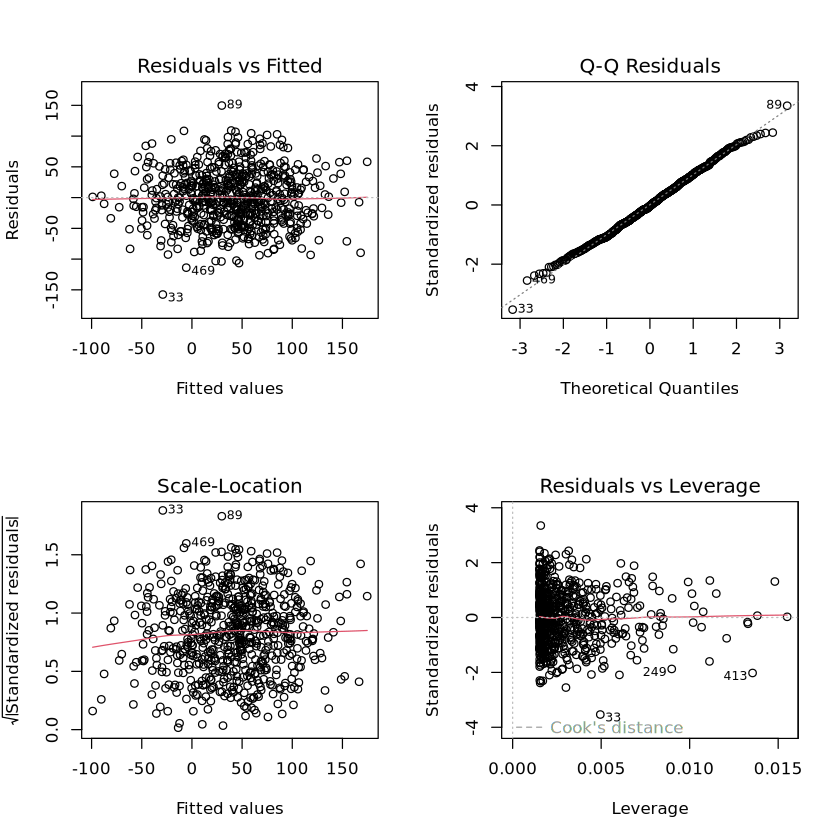

In [191]:
par(mfrow = c(2,2))

plot(regressa_simples)

Para cada gráfico, vamos fazer um pequeno estudo a respeito da linearidade do modelo:

1. O gráfico ao superior esquerdo é fundamental para identificar a "perfeição linear":
    * A proximidade das ocorrências na linha central demonstra a intensidade da linearidade do modelo:
        * No acima, embora exista uma grande concentração de ocorrências no eixo central, existem muitas ocorrências que estão mais distantes;
        * Embora ocorra uma relação linear entre a variável dependente e a independente, é demonstrado que a explicação presente no modelo não é perfeita.

---

2. O gráfico ao superior direito identifica a distribuição normal dos resíduos:
    * Quanto mais distribuição na diagonal, mais aparente é a distribuição normal dos resíduos;
    * Como é uma pequena parcela dos resíduos que não tocam a linha diagonal, pode-se dizer que a distribuição dos resíduos aparenta ser muito perto da distribuição normal.

---

3. O gráfico ao inferior esquerdo identifica o quanto é homogêneo o resíduo resultante da predição do modelo:
    * Quanto mais regular a distribuição na reta vermelha (parcialmente horizontal), mais homogêneo estará o resíduo produzido pelo modelo de regressão;
    * As ocorrências de resíduos estão extremamente próximas do centro, entretanto não estão homogêneas na reta, isto indica que o modelo não possui um resíduo constante para sua predição, podendo variar bastante a partir de qual predição.
        * O modelo pode acertar bastante em algum momento, mas errar muito em outro.
        * O modelo não é tão confiável.

---

4. O gráfico ao inferior direito procura identificar a existência de resíduos que se enquadram como pontos de alavancagem, ou seja, se alguma unidade observada/experimental está
discrepante ao ponto de influenciar na estimação do modelo:
    * Caso existam, os resíduos devem estar além da faixa -3 e 3;
    * Ocorrências na reta vermelha (parcialmente horizontal) indicam valores que influenciam a estimação do modelo;
    * Como pode ser verificado, a maior parte dos valores estão presentes no início do gráfico, na parte esquerda, não apenas presentes na reta horizontal mas também em toda a vertical desta extremidade:
        * Embora existam valores na reta parcialmente horizontal, é verificado que não é o comportamento mais presente, ou seja, os resíduos não estão influenciando tanto a estimação do modelo;
        * Outrossim, ainda que existam muitas ocorrências de resíduos na vertical esquerda, vale ressaltar que não estão entre o intervalo +3 e -3, com apenas duas ocorrências nesses momentos, ou seja, não está ocorrendo alavancagem. 

#### 3.1.3 Uma análise mais corrida, mas com dados normalizados

In [ ]:
data$Tempo_entrega_z <- scale(data$Tempo_entrega)
data$Trafego_z <- scale(data$Trafego)

regressao_simples_normalizada <- lm(Tempo_entrega_z ~ Trafego_z, data = data)

regressao_simples_normalizada

summary(regressao_simples_normalizada)


Call:
lm(formula = Tempo_entrega_z ~ Trafego_z, data = data)

Coefficients:
(Intercept)    Trafego_z  
  -0.005446     0.718490  



Call:
lm(formula = Tempo_entrega_z ~ Trafego_z, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.47660 -0.47337 -0.02499  0.48608  2.35152 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.005446   0.027357  -0.199    0.842    
Trafego_z    0.718490   0.027411  26.212   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7023 on 657 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.5112,	Adjusted R-squared:  0.5104 
F-statistic: 687.1 on 1 and 657 DF,  p-value: < 2.2e-16


Embora tenha ocorrido variação do p-valor para o intercepto, o valor do $\beta_1$ ainda é muito inferior a 0.01%, isto significa que o modelo normalizado ainda representa um comportamento linear.

Nota-se que a estatística F ainda é a mesma!

In [193]:
anova(regressao_simples_normalizada)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Trafego_z,1,338.8548,338.8548493,687.0775,3.318298e-104
Residuals,657,324.0212,0.4931829,NA,NA


Normalizando a base de dados, temos valores muito menores na soma de quadrados da regressão e dos resíduos!

Isto permite identificar uma média da soma de quadrados dos resíduos menor do que 1, além de uma média da soma de quadrados de regressão muito maior do que 1. Finalmente, uma tabela ANOVA mais reconhecível do que a do modelo não normalizado.

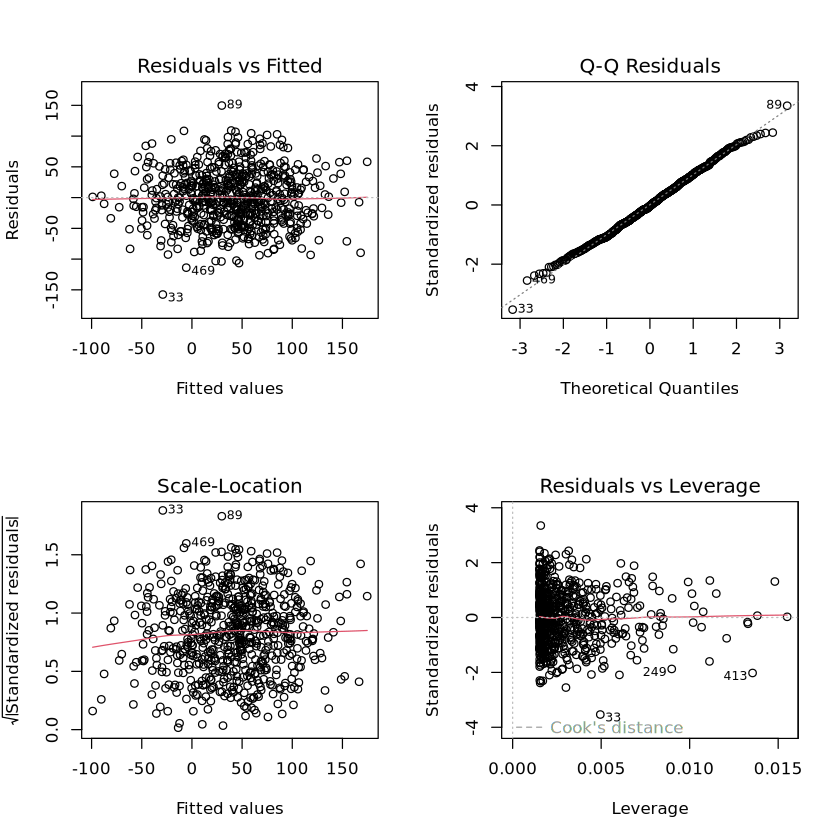

In [194]:
par(mfrow = c(2,2))

plot(regressa_simples)

Os gráficos permaneceram com o mesmo comportamento, ou seja, a mesma análise acima pode ser colocada abaixo.

Não ocorreu melhora na performance do modelo ao ocorrer a normalização.

---

### 3.2 Tentativa com Regressão Linear Múltipla

---

Antes de qualquer coisa, vamos substituir os valores categóricos por valores numéricos, que poderão ser interpretados pelo modelo de regressão linear múltipla:

In [ ]:
data <- data %>%
  mutate(Tecnologia_rastreamento = recode(Tecnologia_rastreamento,
                                          "Nao" = 0,
                                          "Sim" = 1))

data <- data %>%
  mutate(Infraestrutura_rodoviaria = recode(Infraestrutura_rodoviaria,
                                            "Bom" = 2,
                                            "Medio" = 1,
                                            "Ruim" = 0))

head(data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Tecnologia_rastreamento = recode(Tecnologia_rastreamento, Nao =
  0, Sim = 1)`.
Caused by warning in `recode.numeric()`:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Infraestrutura_rodoviaria = recode(Infraestrutura_rodoviaria,
  Bom = 2, Medio = 1, Ruim = 0)`.
Caused by warning in `recode.numeric()`:
! NAs introduced by coercion”


,Distancia_entrega,Volume_pacotes,Capacidade_frota,Investimento_logistica,Infraestrutura_rodoviaria,Trafego,Tecnologia_rastreamento,Numero_paradas,Tempo_entrega,Tempo_entrega_z,Trafego_z
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
1,NA,80.76512,76.11893,8.514724,1,29.34996,1,57.56337,19.32711,-0.3190535,0.40451325
2,53.06465,82.85297,85.59876,43.055652,0,21.60807,0,56.90608,31.37375,-0.1297298,-0.08039517
3,83.37848,76.99390,87.76201,49.499836,2,17.41814,1,90.47625,100.48040,0.9563419,-0.34282927
4,57.95582,87.97137,94.87850,34.868130,0,46.06299,1,63.30773,111.00269,1.1217089,1.45132386
5,44.03922,90.45339,78.56679,42.272930,0,11.73149,0,48.08624,-38.63779,-1.2300228,-0.69900910
6,48.88859,73.14187,82.45690,21.847603,1,12.77099,1,53.03885,26.54162,-0.2056711,-0.63390093


---
Vamos tentar realizar um modelo de regressão linear múltipla com todas as variáveis do modelo, com a tentativa de identificar um modelo preditivo com um melhor resultado do modelo mais simples acima. Após isso, vamos tentar simplificar este modelo para um mais simples (menos variáveis consideradas), além de manter a sua eficiência.

Em nossa primeira tentativa, iremos realizar isto sem a normalização dos dados.

#### Regressão Linear Múltipla sem Normalização

In [182]:
regressa_linear_multipla = lm(Tempo_entrega ~ Distancia_entrega + Volume_pacotes +
                            Capacidade_frota + Investimento_logistica + Infraestrutura_rodoviaria +
                            Trafego + Tecnologia_rastreamento + Numero_paradas,
                            data=data)

regressa_linear_multipla

summary(regressa_linear_multipla)


Call:
lm(formula = Tempo_entrega ~ Distancia_entrega + Volume_pacotes + 
    Capacidade_frota + Investimento_logistica + Infraestrutura_rodoviaria + 
    Trafego + Tecnologia_rastreamento + Numero_paradas, data = data)

Coefficients:
              (Intercept)          Distancia_entrega  
                  10.7833                     2.2611  
           Volume_pacotes           Capacidade_frota  
                  -3.6656                     1.4904  
   Investimento_logistica  Infraestrutura_rodoviaria  
                   1.0577                     4.0691  
                  Trafego    Tecnologia_rastreamento  
                   2.8664                     0.7915  
           Numero_paradas  
                  -0.5315  



Call:
lm(formula = Tempo_entrega ~ Distancia_entrega + Volume_pacotes + 
    Capacidade_frota + Investimento_logistica + Infraestrutura_rodoviaria + 
    Trafego + Tecnologia_rastreamento + Numero_paradas, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.192  -6.315  -0.440   6.483  28.517 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               10.78333    7.26975   1.483   0.1386    
Distancia_entrega          2.26114    0.94774   2.386   0.0174 *  
Volume_pacotes            -3.66558    0.05252 -69.792  < 2e-16 ***
Capacidade_frota           1.49041    0.06605  22.565  < 2e-16 ***
Investimento_logistica     1.05770    0.03997  26.460  < 2e-16 ***
Infraestrutura_rodoviaria  4.06905    0.51253   7.939 1.26e-14 ***
Trafego                    2.86645    0.02681 106.931  < 2e-16 ***
Tecnologia_rastreamento    0.79152    0.86042   0.920   0.3580    
Numero_paradas            -0.53153    0.87486  -0.608   0.5437    
-